In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.linear_model import LinearRegression

#Survival 0 = No, 1 = Yes
#sibsp # of siblings / spouses aboard the Titanic
#parch # of parents / children aboard the Titanic
#embarked=Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

train = pd.read_csv('train.csv')

In [87]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The relevant features are Survived, Pclass, Sex, Age, SibSp, Parch, Fare and Embarked

In [4]:
mean = train.groupby(['Sex','Pclass']).mean()[['Survived','SibSp','Parch','Fare']]
count = train.groupby(['Sex','Pclass']).count()['Survived']
new_df = pd.concat([mean, count], axis=1)
new_df.columns= ['Survived', 'SibSp', 'Parch','Fare','count']
new_df

Survived     SibSp     Parch        Fare  count
Sex    Pclass                                                 
female 1       0.968085  0.553191  0.457447  106.125798     94
       2       0.921053  0.486842  0.605263   21.970121     76
       3       0.500000  0.895833  0.798611   16.118810    144
male   1       0.368852  0.311475  0.278689   67.226127    122
       2       0.157407  0.342593  0.222222   19.741782    108
       3       0.135447  0.498559  0.224784   12.661633    347

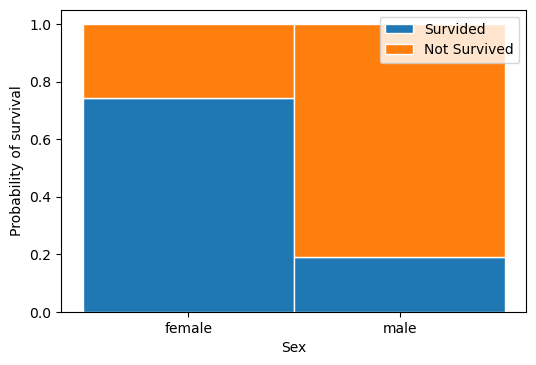

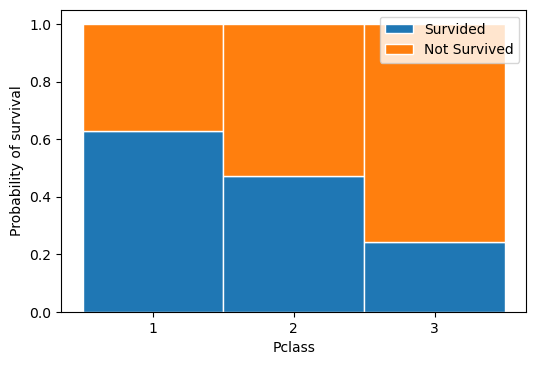

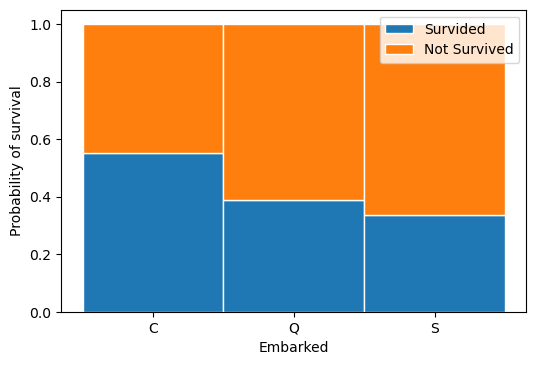

In [5]:
for feature in ['Sex','Pclass','Embarked']:
    bins = pd.DataFrame(train.groupby([feature]).mean()['Survived'])

    x  = bins.index
    y0 = bins['Survived']
    y1 = 1-y0

    fig, ax = plt.subplots(dpi = 100)
    ax.bar(x, y0, edgecolor="white", width= 1, label = 'Survided')
    ax.bar(x, y1, edgecolor="white", bottom = y0 , width= 1, label = 'Not Survived')

    plt.xlabel(feature)
    plt.ylabel('Probability of survival')
    ax.legend()
    ax.xaxis.set_major_locator(MultipleLocator(1))
    plt.show()

In [9]:
mean = train.groupby(['Pclass','Embarked']).mean()[['Survived','SibSp','Parch','Fare']]
count = train.groupby(['Pclass','Embarked']).count()['Survived']
new_df = pd.concat([mean, count], axis=1)
new_df.columns= ['Survived', 'SibSp', 'Parch','Fare','count']
new_df

Survived     SibSp     Parch        Fare  count
Pclass Embarked                                                 
1      C         0.694118  0.376471  0.317647  104.718529     85
       Q         0.500000  1.500000  0.000000   90.000000      2
       S         0.582677  0.433071  0.393701   70.364862    127
2      C         0.529412  0.588235  0.529412   25.358335     17
       Q         0.666667  0.000000  0.000000   12.350000      3
       S         0.463415  0.390244  0.371951   20.327439    164
3      C         0.378788  0.348485  0.378788   11.214083     66
       Q         0.375000  0.416667  0.180556   11.183393     72
       S         0.189802  0.705382  0.439093   14.644083    353

We can see that Sex and Pclass are strong indicators of survival rate. The C embarkment location seems also to indicate survival but looks correlated to higher Pclass passanger boarding at that location

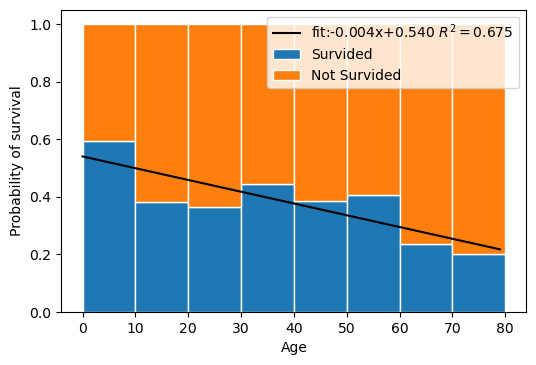

In [88]:
bin_size = 10
max_age = train['Age'].max()
bins = np.append(np.arange(0,max_age, bin_size),[max_age])
labels = (bins[:-1]+bins[1:])/2
train['Age_bin'] = pd.cut(train['Age'], bins = bins, labels = labels)

x  = labels
y0 = train.groupby(['Age_bin']).mean()['Survived']
y1 = 1-y0

reg = LinearRegression()
reg.fit(x.reshape(-1, 1), y0)

xp = np.arange(0,80,1)
yp = reg.predict(xp.reshape(-1, 1))

a = '%.3f' % reg.coef_[0]
m = '%.3f' % reg.intercept_
r2= '%.3f' % reg.score(x.reshape(-1, 1), y0)

fig, ax = plt.subplots(dpi = 100)
ax.plot(xp,yp, 'k', label = 'fit:'+a+'x+'+m+' $R^2=$'+r2)
ax.bar(x, y0, edgecolor="white", width= bin_size, label = 'Survided')
ax.bar(x, y1, edgecolor="white", bottom = y0 , width= bin_size, label = 'Not Survided')

plt.xlabel('Age')
plt.ylabel('Probability of survival')
ax.legend()
plt.show()

Correlation of survival to age seems to be weak except at the egdes. Children surviving more on average and  and 60+ passangers less.

In [89]:
mean = train.loc[train['Age_bin']>5].groupby(['Pclass']).mean()[['Survived','SibSp','Parch','Fare']]
count = train.loc[train['Age_bin']>5].groupby(['Pclass']).count()['Survived']
new_df = pd.concat([mean, count], axis=1)
new_df.columns= ['Survived', 'SibSp', 'Parch','Fare','count']
new_df

,Survived,SibSp,Parch,Fare,count
Pclass,,,,,
1,0.655738,0.448087,0.382514,87.299978,183
2,0.423077,0.384615,0.301282,20.679460,156
3,0.212219,0.340836,0.321543,11.646904,311


In [15]:
mean = train.loc[train['Age_bin']==5].groupby(['Pclass']).mean()[['Survived','SibSp','Parch','Fare']]
count = train.loc[train['Age_bin']==5].groupby(['Pclass']).count()['Survived']
new_df = pd.concat([mean, count], axis=1)
new_df.columns= ['Survived', 'SibSp', 'Parch','Fare','count']
new_df

,Survived,SibSp,Parch,Fare,count
Pclass,,,,,
1,0.666667,0.666667,2.000000,128.319433,3
2,1.000000,0.823529,1.352941,28.740200,17
3,0.431818,2.318182,1.409091,24.415055,44


Children in 3rd class seem to have a survival rate doubling the average for third class but still smaller than females of third class.

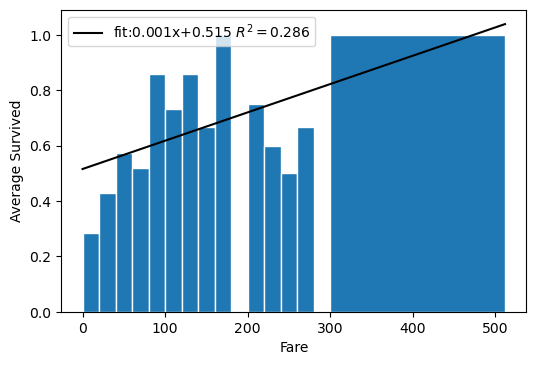

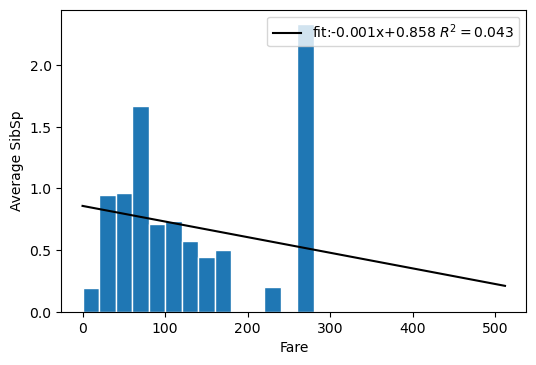

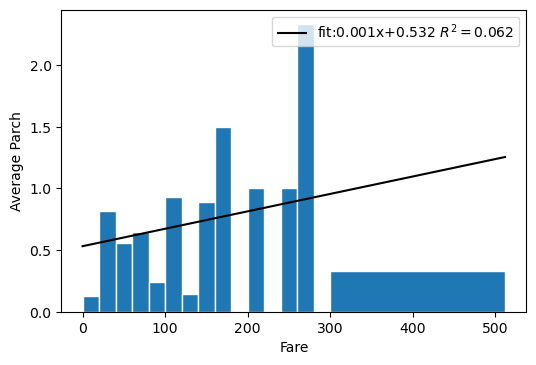

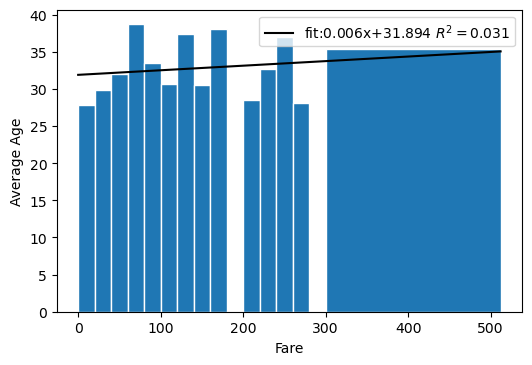

In [273]:
for feature in ['Survived','SibSp','Parch', 'Age']:
    bin_size = 20
    max_fare = train['Fare'].max()
    bins =  np.append(np.arange(0,300,bin_size),[300,max_fare])
    labels = (bins[:-1]+bins[1:])/2
    train['Fare_bin'] = pd.cut(train['Fare'], bins = bins, labels = labels)
    data_array = pd.DataFrame(train.groupby(['Fare_bin']).mean()[feature]).dropna().reset_index().to_numpy()

    x  = data_array[:,0]
    y0 = data_array[:,1]
    widths =  np.append((np.ones(len(x)-1))*bin_size,[[bins[-1]-bins[-2]]])

    reg = LinearRegression()
    reg.fit(x.reshape(-1, 1), y0)

    xp = np.arange(0,max_fare,1)
    yp = reg.predict(xp.reshape(-1, 1))

    a = '%.3f' % reg.coef_[0]
    m = '%.3f' % reg.intercept_
    r2= '%.3f' % reg.score(x.reshape(-1, 1), y0)

    fig, ax = plt.subplots(dpi = 100)
    ax.plot(xp,yp, 'k', label = 'fit:'+a+'x+'+m+' $R^2=$'+r2)
    ax.bar(x, y0, edgecolor="white", width= widths)

    plt.xlabel('Fare')
    plt.ylabel('Average '+feature)
    ax.legend()
    plt.show()

Fare looks weakly correlated to other features beyond survival and even then seems to predict the same as Pclass.

In [19]:
auxtrain = train.copy()
auxtrain.loc[auxtrain['Parch']>0, ['Parch']] = 1
auxtrain.loc[auxtrain['SibSp']>0, ['SibSp']] = 1
auxtrain['Fml'] = 0
auxtrain.loc[(auxtrain['SibSp']>0)&(auxtrain['Parch']>0), ['Fml']] = 1

mean = auxtrain.groupby(['Sex','Pclass','Parch']).mean()[['Survived','Age','Fare','SibSp','Fml']]
count = auxtrain.groupby(['Sex','Pclass','Parch']).count()[['Survived']]
new_df = pd.concat([mean, count], axis=1)
new_df.columns= ['Survived','Age','Fare','SibSp','Fml','count']
new_df

Survived        Age        Fare     SibSp       Fml  \
Sex    Pclass Parch                                                        
female 1      0      0.984375  36.285714   95.302930  0.468750  0.000000   
              1      0.933333  31.379310  129.214583  0.500000  0.500000   
       2      0      0.888889  32.058140   16.873796  0.288889  0.000000   
              1      0.967742  24.096774   29.368013  0.612903  0.612903   
       3      0      0.588235  24.018519   10.207652  0.294118  0.000000   
              1      0.372881  19.197917   24.634885  0.644068  0.644068   
male   1      0      0.363636  42.506410   51.403325  0.242424  0.000000   
              1      0.391304  37.126957  135.332970  0.434783  0.434783   
       2      0      0.089888  33.631250   17.767134  0.191011  0.000000   
              1      0.473684  18.570000   28.991453  0.789474  0.789474   
       3      0      0.121622  28.816667    9.970506  0.108108  0.000000   
              1      0.215686  15.230698   28.280722  0.882353  0.882353   

                     count  
Sex    Pclass Parch         
female 1      0         64  
              1         30  
       2      0         45  
              1         31  
       3      0         85  
              1         59  
male   1      0         99  
              1         23  
       2      0         89  
              1         19  
       3      0        296  
              1         51

Parch > 0 increases survival rate for males but decreses it for females, except for second class. I guess single females were evacuated first, starting from first class, then families (or just mothers?) with children. Parch > 0  also correlates with increased Fares within Pclass, presumably family accomodations were more expensive.

In [17]:
mean = auxtrain.groupby(['Sex','Pclass','SibSp']).mean()[['Survived','Age','Fare','Parch','Fml']]
count = auxtrain.groupby(['Sex','Pclass','SibSp']).count()[['Survived']]
new_df = pd.concat([mean, count], axis=1)
new_df.columns= ['Survived','Age','Fare','Parch','Fml','count']
new_df

Survived        Age        Fare     Parch       Fml  \
Sex    Pclass SibSp                                                        
female 1      0      0.979592  34.000000  105.431292  0.306122  0.306122   
              1      0.955556  35.333333  106.882038  0.333333  1.000000   
       2      0      0.931818  30.440476   16.304357  0.272727  0.272727   
              1      0.906250  26.468750   29.760547  0.593750  1.000000   
       3      0      0.592593  22.866071   10.625826  0.259259  0.259259   
              1      0.380952  20.391304   23.181217  0.603175  1.000000   
male   1      0      0.329545  42.738806   58.403028  0.147727  0.147727   
              1      0.470588  38.409412   90.062382  0.294118  1.000000   
       2      0      0.118421  32.870597   15.085362  0.052632  0.052632   
              1      0.250000  26.281250   30.800781  0.468750  1.000000   
       3      0      0.129630  29.012539    9.594749  0.022222  0.022222   
              1      0.155844  18.450000   23.415642  0.584416  1.000000   

                     count  
Sex    Pclass SibSp         
female 1      0         49  
              1         45  
       2      0         44  
              1         32  
       3      0         81  
              1         63  
male   1      0         88  
              1         34  
       2      0         76  
              1         32  
       3      0        270  
              1         77

SibSp>0 increases survival rate for males but decreses it for females as Parch did but without the 2nd class exception.

In [20]:
mean = auxtrain.groupby(['Sex','Pclass','Fml']).mean()[['Survived','Age','Fare']]
count = auxtrain.groupby(['Sex','Pclass','Fml']).count()[['Survived']]
new_df = pd.concat([mean, count], axis=1)
new_df.columns= ['Survived','Age','Fare','count']
new_df

Survived        Age        Fare  count
Sex    Pclass Fml                                        
female 1      0    0.987342  35.400000   96.998259     79
              1    0.866667  30.933333  154.197500     15
       2      0    0.912281  30.100000   18.163523     57
              1    0.947368  24.736842   33.389916     19
       3      0    0.575472  23.361111   11.643950    106
              1    0.289474  17.883333   28.601313     38
male   1      0    0.357143  41.434066   61.524554    112
              1    0.500000  39.892000  131.083750     10
       2      0    0.107527  32.819405   18.347087     93
              1    0.466667  19.100000   28.388893     15
       3      0    0.129139  28.673241   10.039042    302
              1    0.177778  13.864865   30.262131     45

Looking at both Parch and SibSp>0 do not seem to provide aditioanl insight.

Lets us look at second class females more closely.

In [81]:
mean = auxtrain.loc[(train['Sex']=='female')].groupby(['Pclass','Parch','SibSp']).mean()[['Survived','Age','Fare']]
count = auxtrain.loc[(train['Sex']=='female')].groupby(['Pclass','Parch','SibSp']).count()[['Survived']]
new_df = pd.concat([mean, count], axis=1)
new_df.columns= ['Survived','Age','Fare','count']
new_df

Survived        Age        Fare  count
Pclass Parch SibSp                                        
1      0     0      0.970588  34.937500  105.960538     34
             1      1.000000  38.083333   83.224307     30
       1     0      1.000000  31.857143  104.231667     15
             1      0.866667  30.933333  154.197500     15
2      0     0      0.906250  33.383333   13.793491     32
             1      0.846154  29.000000   24.456085     13
       1     0      1.000000  23.083333   23.000000     12
             1      0.947368  24.736842   33.389916     19
3      0     0      0.616667  23.565789    8.234727     60
             1      0.520000  25.093750   14.942672     25
       1     0      0.523810  21.388889   17.457538     21
             1      0.289474  17.883333   28.601313     38

It seems females with spouses+children survived more than just with spouses in second class while in other clases the opposite is true. 

Now we look at the dependence of the survival rate of the fare for specific Sex and Pclass categories.

In [21]:
from IPython.display import display
for sex in ['male','female']:
    for pclass in [1,2,3]:
        train_sorted = train.loc[(train['Sex']== sex)&(train['Pclass'] == pclass)].sort_values('Fare')
        bin_size = 30
        bin_limits = np.append(np.arange(0,len(train_sorted)-bin_size, bin_size),[len(train_sorted)])

        bins = []
        for i in range(0,len(bin_limits)-1):
            bins.append(train_sorted.iloc[bin_limits[i]:bin_limits[i+1]].mean().loc[['Fare','Survived','Age','SibSp','Parch']])
        print('Sex:'+sex+', Pclass: '+str(pclass))
        display(pd.DataFrame(bins))

Sex:male, Pclass: 1


,Fare,Survived,Age,SibSp,Parch
0,21.363470,0.366667,45.260870,0.000000,0.000000
1,31.951940,0.400000,46.833333,0.000000,0.033333
2,56.580147,0.333333,41.407407,0.533333,0.200000
3,153.272525,0.375000,34.230667,0.687500,0.843750


Sex:male, Pclass: 2


,Fare,Survived,Age,SibSp,Parch
0,8.800833,0.066667,33.458333,0.100000,0.033333
1,13.033333,0.133333,33.413793,0.000000,0.000000
2,30.772656,0.229167,27.637609,0.708333,0.479167


Sex:male, Pclass: 3


,Fare,Survived,Age,SibSp,Parch
0,5.892777,0.100000,30.870370,0.100000,0.000000
1,7.232653,0.100000,26.722222,0.066667,0.066667
2,7.600830,0.066667,36.352941,0.033333,0.000000
3,7.774300,0.133333,26.619048,0.100000,0.000000
4,7.882350,0.066667,27.190476,0.066667,0.033333
5,7.907480,0.166667,29.250000,0.100000,0.000000
6,8.045833,0.133333,31.772727,0.066667,0.000000
7,8.332083,0.133333,24.996522,0.000000,0.066667
8,10.575970,0.166667,24.555556,0.300000,0.100000
9,16.541807,0.200000,24.631579,0.700000,0.366667


Sex:female, Pclass: 1


,Fare,Survived,Age,SibSp,Parch
0,47.553757,0.966667,34.148148,0.433333,0.333333
1,82.003887,1.000000,38.555556,0.533333,0.266667
2,179.091050,0.941176,31.580645,0.676471,0.735294


Sex:female, Pclass: 2


,Fare,Survived,Age,SibSp,Parch
0,12.366667,0.900000,31.775862,0.033333,0.133333
1,28.233243,0.934783,26.755556,0.782609,0.913043


Sex:female, Pclass: 3


,Fare,Survived,Age,SibSp,Parch
0,7.600417,0.700000,21.833333,0.000000,0.066667
1,8.224870,0.533333,26.045455,0.233333,0.100000
2,12.991113,0.433333,19.940000,0.500000,0.566667
3,26.974381,0.407407,20.487500,1.981481,1.722222


Males in second and third class survived more at higher fares, but as we seem before this is correlated to having family. Females in third class show the opposite correlation, i.e higher fares have lower survival rates due to having a family member on board.


## Conclusions

It seems that the provability of survival depends primarily on Pclass, Sex, with some dependence on SibSp, Parch. Fare and Embarked all see to be very correlated with the previous ones. Finally Age mostly doesn't affect the provability of survival  except for children, who can be identified from SibSp, Parch, and 60+ passangers.